In [139]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt

import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [15]:
current_date = dt.date.today()
a_year_ago = current_date - dt.timedelta(365)

In [17]:
str(current_date), str(a_year_ago)

('2022-11-07', '2021-11-07')

datetime.timedelta(days=5)

In [18]:
bolsa = ['AMZN.MX', 'CUERVO.MX', 'LIVEPOL1.MX', 'AAPL.MX', 'MSFT.MX',
'BIMBOA.MX', 'CEMEXCPO.MX', 'WMT.MX', 'CHDRAUIB.MX', 'GCARSOA1.MX'
 ]
data = yf.download(bolsa,
                  start = str(a_year_ago),
                  end   = str(current_date),
                  interval = '1d'
                    )

[*********************100%***********************]  10 of 10 completed


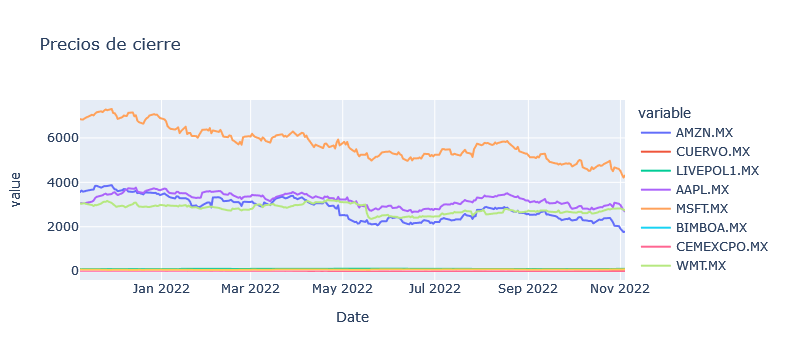

In [19]:
data_close = data['Close']
fig = px.line(data_close, x = data.index, y = bolsa, title = 'Precios de cierre')
fig.show()

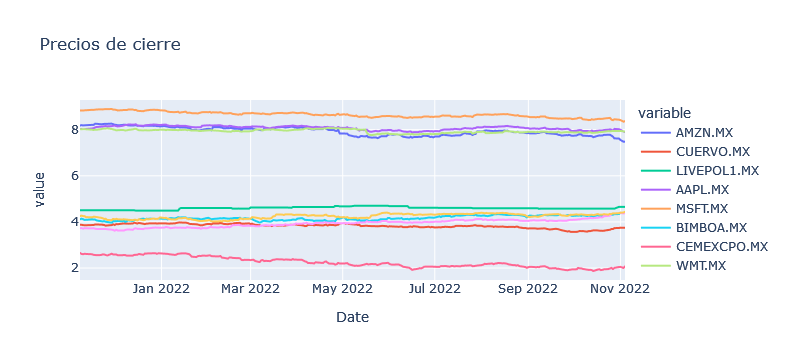

In [20]:
log_data = np.log(data_close[bolsa])

fig = px.line(log_data, x = log_data.index, y = bolsa, title = 'Precios de cierre')
fig.show()

# aplicando Kmeans

In [21]:
kmeans = KMeans(n_clusters = 3).fit(log_data[bolsa].T)
labels = kmeans.predict(log_data[bolsa].T)

In [22]:
zip_labe = zip(log_data[bolsa].T.index, labels)
dict_label = dict(zip_labe)

In [24]:
dict_label

{'AMZN.MX': 0,
 'CUERVO.MX': 1,
 'LIVEPOL1.MX': 1,
 'AAPL.MX': 0,
 'MSFT.MX': 0,
 'BIMBOA.MX': 1,
 'CEMEXCPO.MX': 2,
 'WMT.MX': 0,
 'CHDRAUIB.MX': 1,
 'GCARSOA1.MX': 1}

In [29]:
data_t = log_data[bolsa].T

In [30]:
data_t['clustered'] = labels

In [106]:
clustered_data = data_t.iloc[: ,:-1].T

In [114]:
colors = ['darkviolet', 'deeppink', 'deepskyblue']

In [121]:
fig = go.Figure()
# Create and style traces
for i in dict_label:
    fig.add_trace(go.Scatter(x = clustered_data.index, 
                             y = clustered_data[i], 
                             name = i,
                             line = dict(color= colors[dict_label[i]], width=4)))

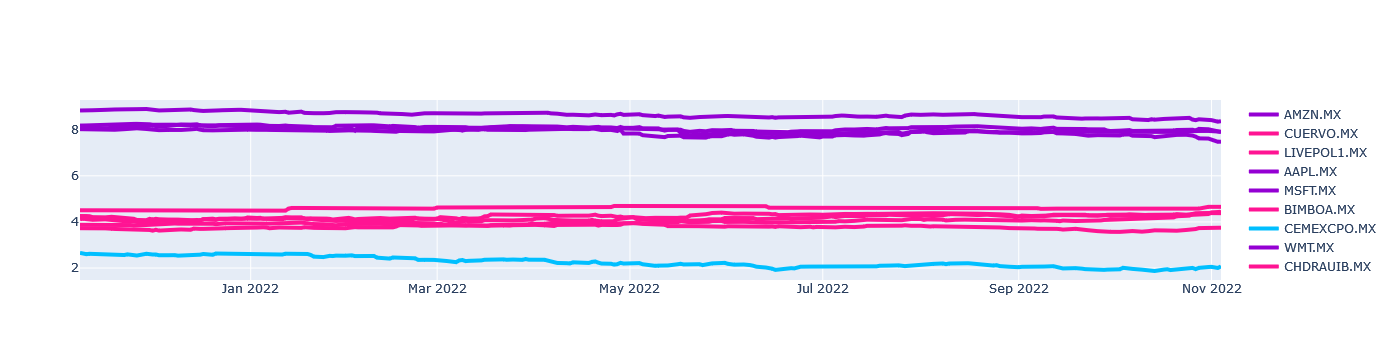

In [123]:
fig.show()

### Cómo funciona K-means?

In [128]:
X, y_true = make_blobs(n_samples = 300, centers = 4,
                       cluster_std = 0.60, random_state = 0)
#haciendo puntos aleatorios

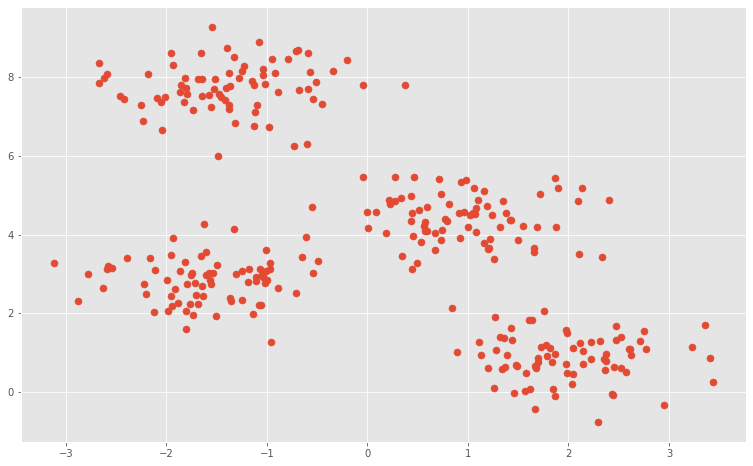

In [129]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], s = 50);

In [130]:
kmeans = KMeans(n_clusters = 2)

In [131]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [132]:
y_kmeans = kmeans.predict(X)

In [133]:
kmeans.cluster_centers_ #centroides de los clusters en coordenadas x,y

array([[-1.33465447,  7.69442683],
       [ 0.45233231,  2.68105561]])

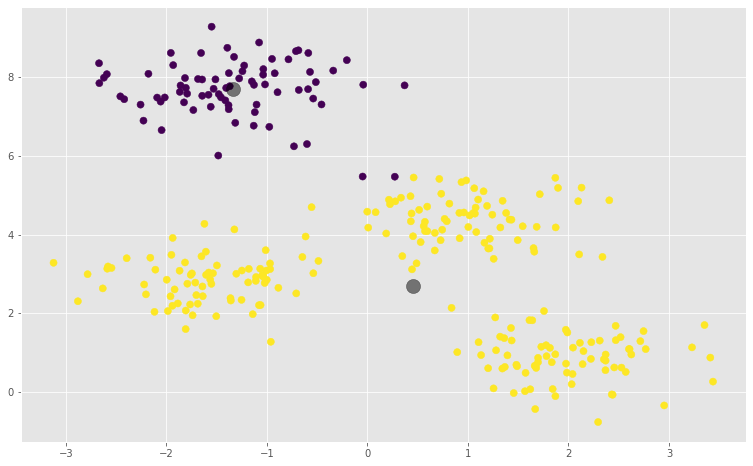

In [134]:
fig, ax = plt.subplots(figsize = (13, 8))

ax.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c = 'k', s = 200, alpha = 0.5);

funcionamiento lento

In [143]:
#set the center randomlly
rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)
centers

array([[ 0.49671415,  3.8617357 ],
       [ 0.64768854,  5.52302986],
       [-0.23415337,  3.76586304],
       [ 1.57921282,  4.76743473]])

In [144]:
pairwise_distances_argmin(X, centers)
#regresa el indice(cluster) al cual pertence la observacion 
#investigar bien qué hace el pairwise

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 0, 3, 0, 2, 2, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 1,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 3, 2, 1, 2, 1, 1, 1, 3, 1, 1,
       0, 2, 1, 2, 0, 3, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 1,
       0, 0, 0, 2, 0, 3, 2, 2, 0, 3, 1, 0, 0, 1, 0, 2, 3, 0, 2, 2, 2, 3,
       2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 3, 1, 3, 2, 2, 3, 1, 2, 2, 0, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 1, 3, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 0, 2, 2, 2, 0, 0, 1, 3, 1, 2, 0,
       1, 2, 3, 1, 1, 0, 0, 2, 2, 3, 3, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2], d

In [145]:
#dibuja puntos
def draw_points(ax, c, factor = 1):
    ax.scatter(X[:, 0], X[:, 1], c = c, cmap = 'viridis',
               s = 50 * factor, alpha = 0.3)
    
#dibuja los centroides
def draw_centers(ax, centers, factor = 1, alpha = 1.0):
    
    ax.scatter(centers[:, 0], centers[:, 1],
               c = np.arange(4), cmap = 'viridis', s = 200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c = 'black', s = 50 * factor, alpha = alpha) 
    
def make_ax(fig, gs):
    #gs es una maya donde hay que graficar
    
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

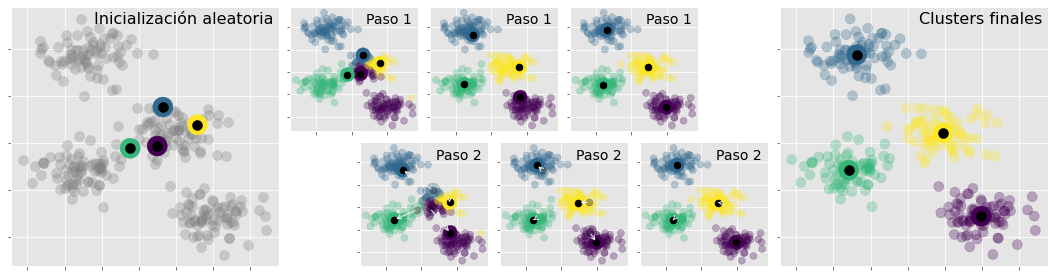

In [146]:
#creando unicamente la figura de tamaño 15x4
fig = plt.figure(figsize = (15, 4))

#creando una maya de 4rebglonesx15columnas
#en las columnas se iran insertando ejes
gs = plt.GridSpec(4, 15, left = 0.02, right = 0.98, bottom = 0.05,
                  top = 0.95, wspace = 0.2, hspace = 0.2)

#creando un eje tomando como maya todos los renglones y dela primera hasat la 4ta columna
ax0 = make_ax(fig, gs[:, :4])
#se agrega texto en la grafica
ax0.text(0.98, 0.98, "Inicialización aleatoria", transform = ax0.transAxes,
         ha = 'right', va = 'top', size = 16)
#puntos grises
draw_points(ax0, 'gray', factor = 2)
#centroides asignados de forma aleatoria
draw_centers(ax0, centers, factor = 2)

for i in range(3):
    
    #crear un eje con sliceings raros para desplazar los graficos
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    #calculo de distancias por pares
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    #ajsute de centroides
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        #anotate coloca flechitas
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops = dict(arrowstyle = '->', linewidth = 1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "Paso 1", transform = ax1.transAxes, ha = 'right',
             va = 'top', size = 14)
    ax2.text(0.95, 0.95, "Paso 2", transform = ax2.transAxes, ha = 'right',
             va = 'top', size = 14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:, -4:])
draw_points(axf, y_pred, factor = 2)
draw_centers(axf, centers, factor = 2)
axf.text(0.98, 0.98, "Clusters finales", transform = axf.transAxes,
         ha = 'right', va = 'top', size = 16);

Para n_clusters = 2 el promedio de silhouette_score es : 0.5426422297358302
Para n_clusters = 3 el promedio de silhouette_score es : 0.5890390393551768
Para n_clusters = 4 el promedio de silhouette_score es : 0.6819938690643478
Para n_clusters = 5 el promedio de silhouette_score es : 0.5923875148758644
Para n_clusters = 6 el promedio de silhouette_score es : 0.49934504405927566


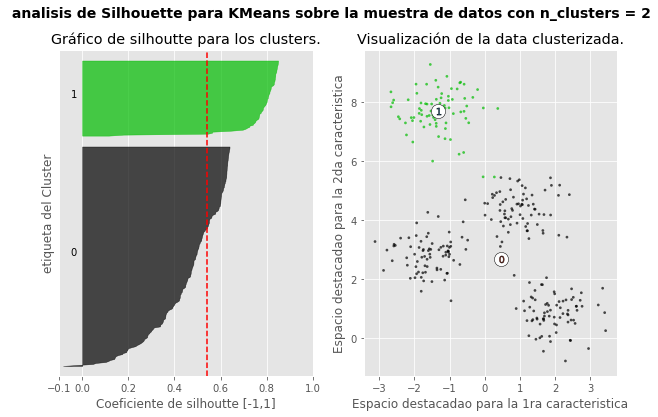

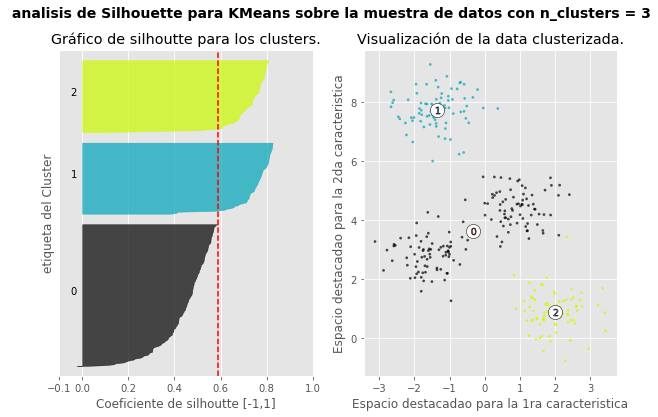

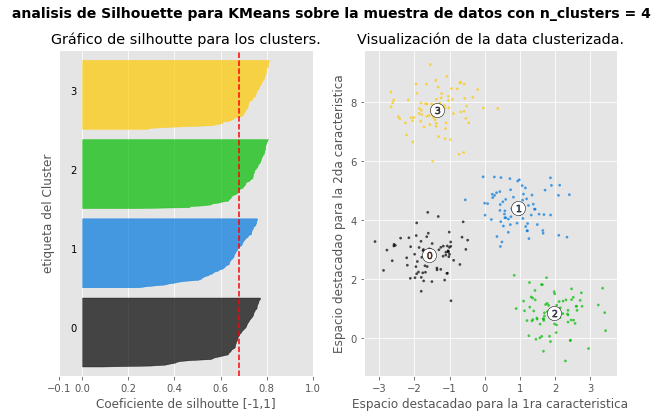

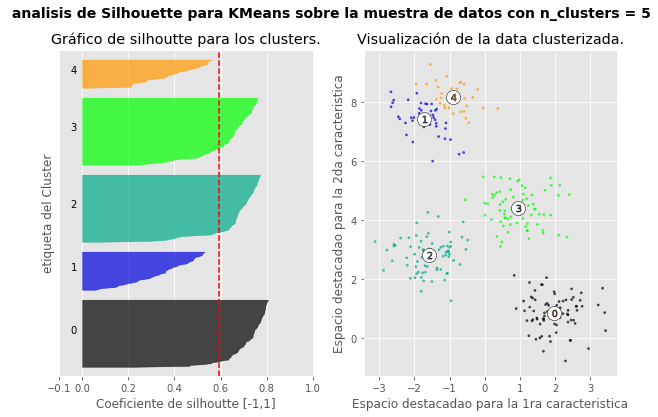

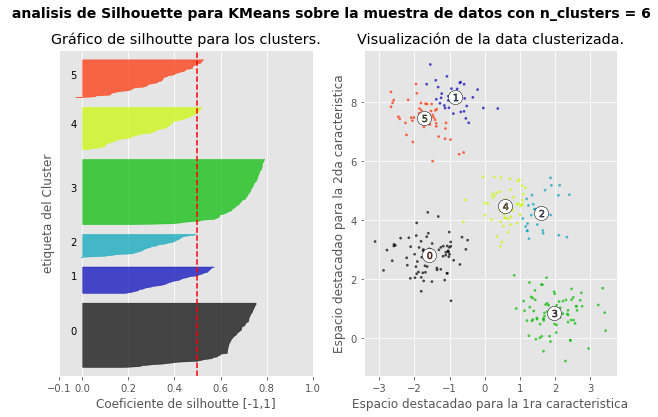

In [148]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
    
    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    clusterer = KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    msn = "Para n_clusters = {} el promedio de silhouette_score es : {}"
    print(msn.format(n_clusters, silhouette_avg))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
       
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        #espacio entre cuchillas
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        #colorea sobre el eje x
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor = color, edgecolor = color, alpha = 0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("Gráfico de silhoutte para los clusters.")
    ax1.set_xlabel("Coeficiente de silhoutte [-1,1]")
    ax1.set_ylabel("etiqueta del Cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7,
                c = colors, edgecolor = 'k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o',
                c = "white", alpha = 1, s = 200, edgecolor = 'k')

    for i, c in enumerate(centers):
                                #marker es un format
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1,
                    s = 50, edgecolor = 'k')

    ax2.set_title("Visualización de la data clusterizada.")
    ax2.set_xlabel("Espacio destacadao para la 1ra caracteristica")
    ax2.set_ylabel("Espacio destacadao para la 2da caracteristica")

    plt.suptitle((" analisis de Silhouette para KMeans sobre la muestra de datos "
                  "con n_clusters = {}".format(n_clusters)),
                 fontsize = 14, fontweight = 'bold');